# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [7]:
# Combine the data into a single DataFrame

mouse_study = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
mouse_study.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [9]:
# Checking the number of mice.
num_mice = mouse_study['Mouse ID'].nunique()
num_mice


249

In [11]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_rows = mouse_study.loc[mouse_study.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_rows

array(['g989'], dtype=object)

In [13]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_study_data = mouse_study[mouse_study['Mouse ID'].isin(duplicate_rows)==False]
clean_study_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [15]:
# Checking the number of mice in the clean DataFrame.
num_mice_clean = clean_study_data['Mouse ID'].nunique()
num_mice_clean

248

## Summary Statistics

In [17]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


summary_regimen = clean_study_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem']).reset_index()
summary_regimen

,Drug Regimen,mean,median,var,std,sem
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='Number of Observed Mouse Timepoints'>

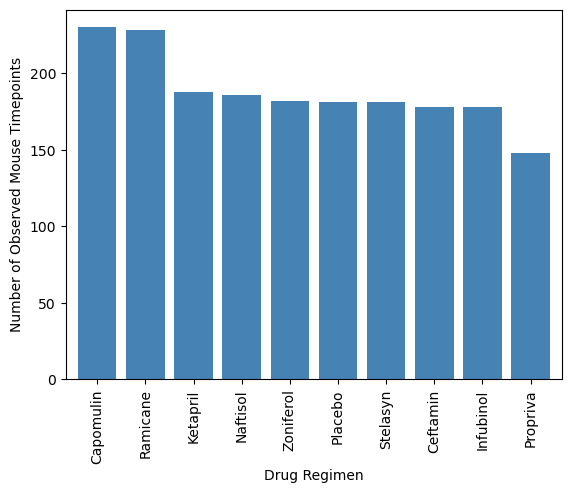

In [19]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

drug_counts = clean_study_data.groupby('Drug Regimen')['Mouse ID'].count()
drug_counts_sorted = drug_counts.sort_values(ascending=False)
bar_pandas = drug_counts_sorted.plot(kind='bar', rot=90, color='steelblue', width = 0.8)

bar_pandas.set_xlabel('Drug Regimen')
bar_pandas.set_ylabel('Number of Observed Mouse Timepoints')

bar_pandas


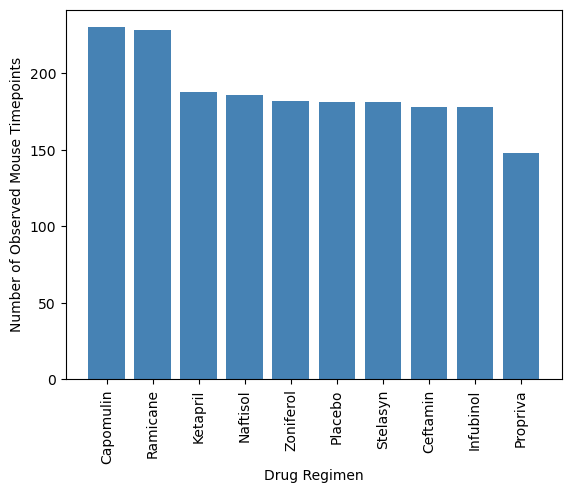

In [21]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.


plt.bar(drug_counts_sorted.index, drug_counts_sorted, color='steelblue', width = 0.8)

plt.xticks(rotation=90)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Observed Mouse Timepoints')

plt.show()


<Axes: ylabel='Sex'>

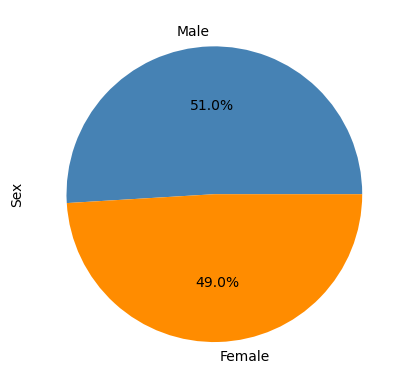

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_distribution = clean_study_data['Sex'].value_counts()

pie_pandas = sex_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=360, colors=['steelblue', 'darkorange'])
pie_pandas.set_ylabel('Sex')
pie_pandas

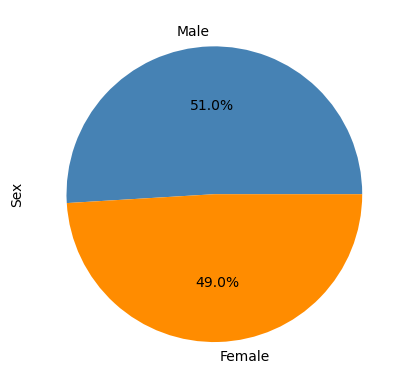

In [25]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_distribution, labels=sex_distribution.index, autopct='%1.1f%%', startangle=360, colors=['steelblue', 'darkorange'])
plt.ylabel('Sex')

plt.show()

## Quartiles, Outliers and Boxplots

In [47]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

selected_drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
df_selected_drugs = clean_study_data.loc[clean_study_data['Drug Regimen'].isin(selected_drugs)]

# Start by getting the last (greatest) timepoint for each mouse

last_timepoints = df_selected_drugs.groupby('Mouse ID')['Timepoint'].max().reset_index()
last_timepoints
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a275,45
3,a411,45
4,a444,45
...,...,...
95,y769,45
96,y793,45
97,y865,45
98,z578,45


In [49]:
merge_df = pd.merge(last_timepoints, df_selected_drugs, on=['Mouse ID', 'Timepoint'], how='left')
merge_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


In [51]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = merge_df['Drug Regimen'].unique()
treatments

array(['Infubinol', 'Ceftamin', 'Ramicane', 'Capomulin'], dtype=object)

In [53]:
# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []

In [61]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for treatment in treatments:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds

    subset = merge_df[merge_df['Drug Regimen'] == treatment]
    tumor_volume_subset = subset['Tumor Volume (mm3)']
    tumor_volume.append(tumor_volume_subset)
    tumor_volume
    
    # Calculate the IQR
    lowerq = tumor_volume_subset.quantile(0.25)
    upperq = tumor_volume_subset.quantile(0.75)
    iqr = upperq - lowerq
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - 1.5 * iqr
    upper_bound = upperq + 1.5 * iqr


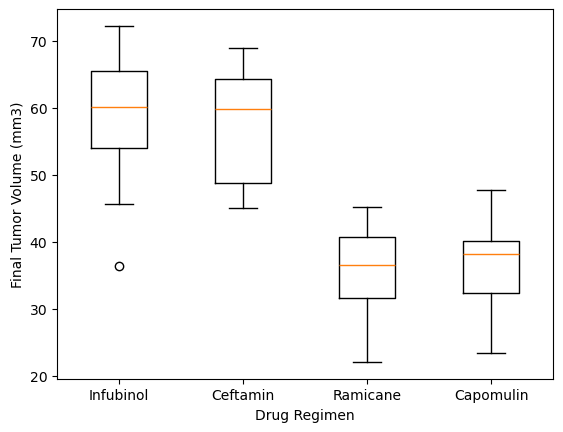

In [57]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_volume, labels=treatments)
plt.xlabel('Drug Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

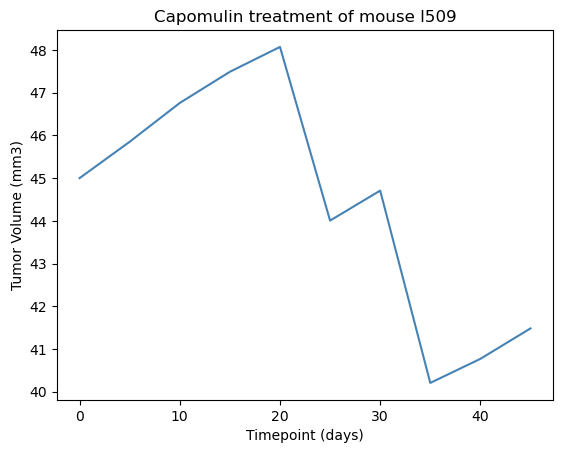

In [65]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = 'l509'
Capomulin_treatment = clean_study_data[(clean_study_data['Mouse ID'] == mouse_id) & (clean_study_data['Drug Regimen'] == 'Capomulin')]

plt.plot(Capomulin_treatment['Timepoint'], Capomulin_treatment['Tumor Volume (mm3)'], linestyle='-', color='steelblue')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Capomulin treatment of mouse l509')
plt.show()

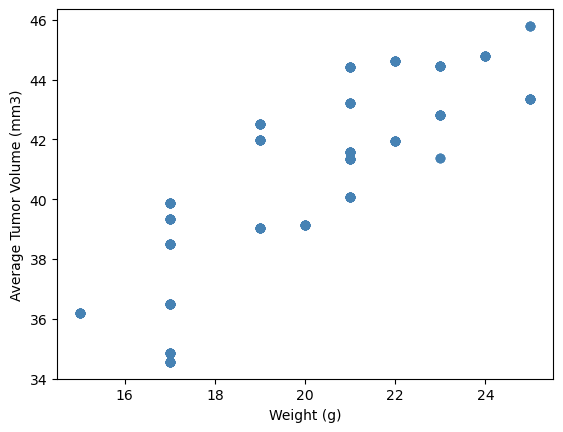

In [71]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

entire_Capomulin_treatment = clean_study_data[clean_study_data['Drug Regimen'] == 'Capomulin']
average_tumor_volume = entire_Capomulin_treatment.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
tumor_vs_weight = pd.merge(average_tumor_volume, clean_study_data[['Mouse ID', 'Weight (g)']], on='Mouse ID', how='left')

plt.scatter(tumor_vs_weight['Weight (g)'], tumor_vs_weight['Tumor Volume (mm3)'], marker='o', color='steelblue')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

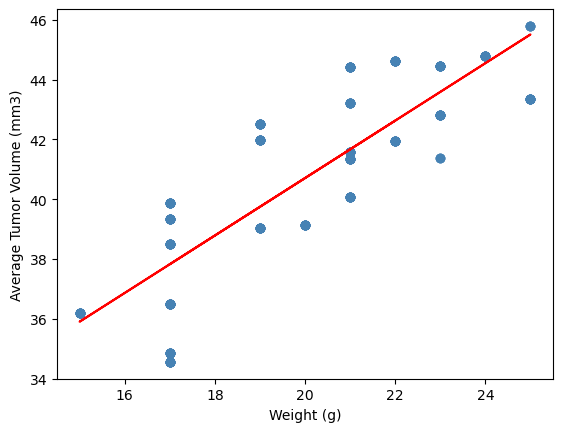

In [75]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

from scipy.stats import linregress
(slope, intercept, rvalue, pvalue, stderr) = linregress(tumor_vs_weight['Weight (g)'], tumor_vs_weight['Tumor Volume (mm3)'])
regress_values = tumor_vs_weight['Weight (g)'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(tumor_vs_weight['Weight (g)'],regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

plt.scatter(tumor_vs_weight['Weight (g)'], tumor_vs_weight['Tumor Volume (mm3)'], marker='o', color='steelblue')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()